# Hands-on Exercise CLASS Module

In [41]:
!pip install --user mlxtend

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
import numpy as np

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions


In [45]:
# Generating Data1

np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data2

np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)


# Generating Data3

np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data4

np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

### 1. Decision Tree

Use __Data3__ to answer the following questions.

<span style="color:red">**Question 1a:** </span> Compute and print the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

In [12]:
dt2 = DecisionTreeClassifier(max_depth=2)
dt2_scores = cross_val_score(dt2, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[dt2_scores.mean(), dt2_scores.std()]

[0.875, 0.03354101966249685]

In [13]:
dt4 = DecisionTreeClassifier(max_depth=4)
dt4_scores = cross_val_score(dt4, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[dt4_scores.mean(), dt4_scores.std()]


[0.9724999999999999, 0.02076655965729518]

In [14]:
dt6 = DecisionTreeClassifier(max_depth=6)
dt6_scores = cross_val_score(dt6, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[dt6_scores.mean(), dt6_scores.std()]

[0.9674999999999999, 0.0225]

In [15]:
dt8 = DecisionTreeClassifier(max_depth=8)
dt8_scores = cross_val_score(dt8, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[dt8_scores.mean(), dt8_scores.std()]

[0.9574999999999999, 0.027499999999999986]

In [16]:
dt10 = DecisionTreeClassifier(max_depth=10)
dt10_scores = cross_val_score(dt10, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[dt10_scores.mean(), dt10_scores.std()]

[0.9475, 0.028394541729001348]

In [17]:
dt50 = DecisionTreeClassifier(max_depth=50)
dt50_scores = cross_val_score(dt50, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[dt50_scores.mean(), dt50_scores.std()]

[0.9375, 0.03749999999999999]

<span style="color:red">**Question 1b:** </span> For what values of max_depth did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:For max depth of 2, the accuracy comes out to be lowest. This phenomenon is called underfitting where depth of the decision tree is too low and model becomes too generalised with lower accuracy** </span>  

<span style="color:red">**Question 1c:** </span> What accuracy did you observe for max depth=50? What is the difference between this accuracy and the highest accuracy? What is this phenomenon called?

<span style="color:green">**Answer: Accuracy at max depth 50 is 0.9375 and highest accuracy is 0.97 which is at max depth 4 and the difference is 0.0325 (approx 3.25%). The phenomemon is more towards overfitting as the accuracy of the model starts to decrease with increasing depth value **</span> 

<span style="color:red">**Question 1d:** </span> Plot decision regions for the above decision tree models

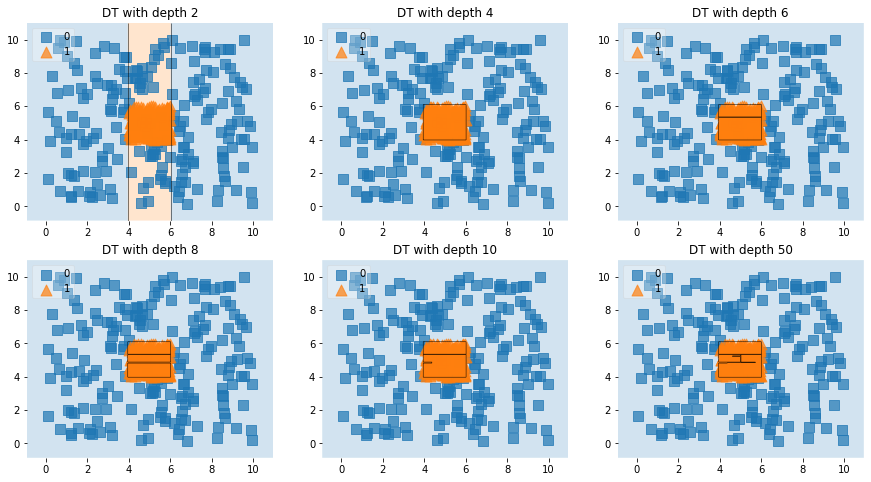

In [28]:
# Creating a list of classifiers and their names for plotting
clf_list = [dt2,dt4,dt6,dt8,dt10,dt50]
labels = ['DT with depth 2','DT with depth 4','DT with depth 6','DT with depth 8','DT with depth 10','DT with depth 50']

# Plotting the decision boundaries
fig = plt.figure(figsize=(15,8))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,3,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()


<span style="color:red">**Question 1e:** </span> Based on the decision regions, which depth is better suited for this data? Explain your reason.

<span style="color:green">**Answer:Based on the decision regions it is visible that graph with DT with depth 4 gives better and balanced fitting classification with highest accuracy ** </span> 

### 2. k Nearest Neighbor

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 2a:** </span>
 Compute and print the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [29]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.9125, 0.02091650066335192]

In [30]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn5, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.9349999999999999, 0.0325]

In [31]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn_scores = cross_val_score(knn10, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.9400000000000001, 0.03436931771216879]

In [32]:
knn50 = KNeighborsClassifier(n_neighbors=50)
knn_scores = cross_val_score(knn50, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.9412499999999999, 0.030644126680328173]

<span style="color:red">**Question 2b:** </span> For what values of n_neighbors did you observe the lowest accuracy? What is this phenomenon called?

<span style="color:green">**Answer:The lowest accuracy is observed for n_neighbour = 1. In this phenomenon where only one neighbour is considered, chances of point getting wrongly classified is higher which is also visible from the relatively lower accuracy of the model. Also this is a case of overfitting with lower accuracy** </span>  

<span style="color:red">**Question 2c:** </span>  Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

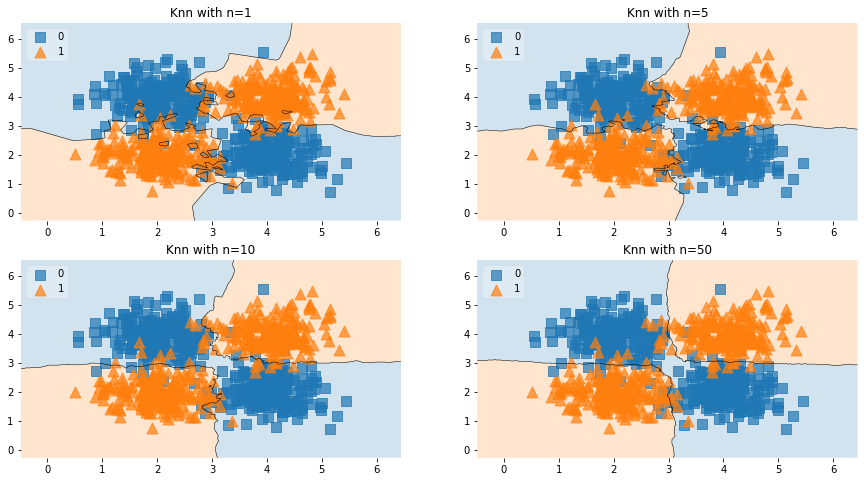

In [33]:
# Creating a list of classifiers and their names for plotting
clf_list = [knn1,knn5,knn10,knn50]
labels = ['Knn with n=1','Knn with n=5','Knn with n=10','Knn with n=50']

# Plotting the decision boundaries
fig = plt.figure(figsize=(15,8))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 2d:** </span>  From the plots for __Question 2c__ what do you notice about the nature of decision boundary as the n_neighbors are increasing.

<span style="color:green">**Answer:Here the nature of the decision boundary moves from overfitting model to balanced model with increasing values of n_neighbours  ** </span>   

### 3. Naive Bayes

<span style="color:red">**Question 3a:** </span> Compute and print the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

In [39]:
nb = GaussianNB()
nb1_scores = cross_val_score(nb, Data1_X, Data1_Y, cv=10, scoring='accuracy')
[nb1_scores.mean(), nb1_scores.std()]

[0.9675, 0.03172144385112379]

In [40]:
nb = GaussianNB()
nb2_scores = cross_val_score(nb, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[nb2_scores.mean(), nb2_scores.std()]

[0.049999999999999996, 0.026809513236909017]

In [41]:
nb = GaussianNB()
nb3_scores = cross_val_score(nb, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[nb3_scores.mean(), nb3_scores.std()]

[0.96, 0.027838821814150098]

In [42]:
nb = GaussianNB()
nb4_scores = cross_val_score(nb, Data4_X, Data4_Y, cv=10, scoring='accuracy')
[nb4_scores.mean(), nb4_scores.std()]

[0.9640736294517807, 0.026052087140989725]

<span style="color:red">**Question 3b:** </span> State your observations on the datasets the NB algorithm performed poorly.

<span style="color:green">**Answer:NB performs poorly on Dataset 2 as accuracy is lowest** </span>  

<span style="color:red">**Question 3c:** </span> Plot decision regions for a NB classifier on each of the four datasets

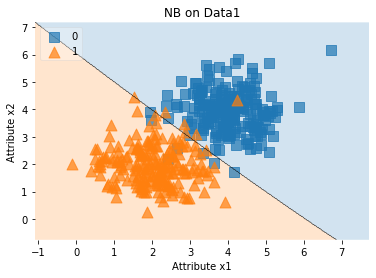

In [47]:
nb.fit(Data1_X, Data1_Y)
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

plot_decision_regions(X=Data1_X, y=Data1_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB on Data 1')
plt.show()


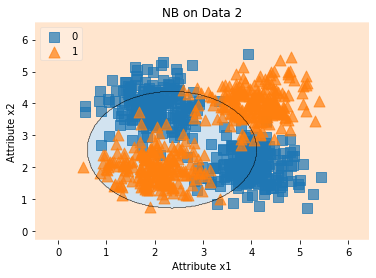

In [48]:
nb.fit(Data2_X, Data2_Y)
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

plot_decision_regions(X=Data2_X, y=Data2_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB on Data 2')
plt.show()

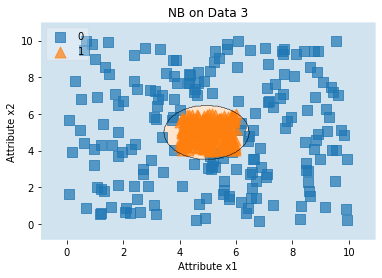

In [49]:
nb.fit(Data3_X, Data3_Y)
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

plot_decision_regions(X=Data3_X, y=Data3_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB on Data 3')
plt.show()

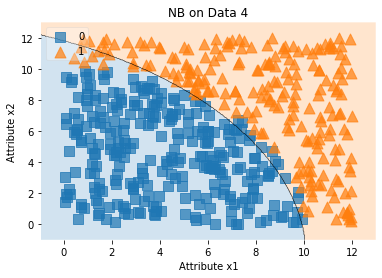

In [50]:
nb.fit(Data4_X, Data4_Y)
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}

plot_decision_regions(X=Data4_X, y=Data4_Y, clf=nb, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('NB on Data 4')
plt.show()

<span style="color:red">**Question 3d:** </span> Describe the shape of the decision boundary on all four datasets. Explain the reason.

<span style="color:green">**Answer:Shape of decision boundary on dataset 1 is linear (straight line), on dataset 2 and 3 is radial (eliptical) on dataset 4 is ploynomial (curved line). These boundaries are made based on the classification considering the higher probablity of data points in a same class ** </span>  

<span style="color:red">**Question 3e:** </span> Based on your plots in __Question 3c__ explain the poor performance of NB on some datasets.

<span style="color:green">**Answer:Based on the plots we can say that NB performs poorly on Dataset 2 primarily becasue for this typical type of distribution of data points, it becomes difficult for NB to clearly and accurately classify points in respective classes ** </span>  

### 4. Support Vector Machines (Linear)

<span style="color:red">**Question 4a:** </span>  Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

<span style="color:green">**Answer:According to me SVM will accuartely classify dataset in the following order: Dataset 1 > dataset 4 > dataset 3 > dataset 2** </span>


<span style="color:red">**Question 4b:** </span>  Compute and print the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [51]:
svm_linear = SVC(C=0.5, kernel='linear')
svm_linear1_scores = cross_val_score(svm_linear, Data1_X, Data1_Y, cv=10, scoring='accuracy')
[svm_linear1_scores.mean(), svm_linear1_scores.std()]

[0.9674999999999999, 0.02968585521759479]

In [52]:
svm_linear = SVC(C=0.5, kernel='linear')
svm_linear2_scores = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_linear2_scores.mean(), svm_linear2_scores.std()]

[0.14125000000000001, 0.06124999999999999]

In [53]:
svm_linear = SVC(C=0.5, kernel='linear')
svm_linear3_scores = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=10, scoring='accuracy')
[svm_linear3_scores.mean(), svm_linear3_scores.std()]

[0.6425000000000001, 0.0275]

In [54]:
svm_linear = SVC(C=0.5, kernel='linear')
svm_linear4_scores = cross_val_score(svm_linear, Data4_X, Data4_Y, cv=10, scoring='accuracy')
[svm_linear4_scores.mean(), svm_linear4_scores.std()]

[0.9259463785514207, 0.03147481962633185]

<span style="color:red">**Question 4c:** </span> Rank the datasets in the decreasing order of accuracy of SVM.

<span style="color:green">**Answer:Following is the ranking of the dataset based on its accuracy : data 1 > data 4 > data 3 > data 2** </span>


<span style="color:red">**Question 4d:** </span>  Plot decision regions for a linear SVM classifier on each of the four datasets

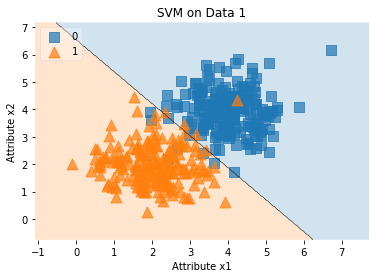

In [55]:
svm_linear.fit(Data1_X, Data1_Y)


plot_decision_regions(X=Data1_X, y=Data1_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM on Data 1')
plt.show()

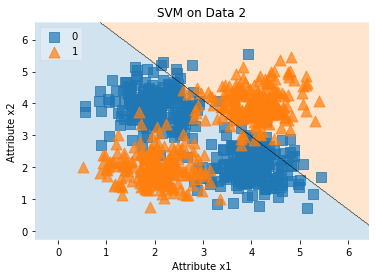

In [56]:
svm_linear.fit(Data2_X, Data2_Y)


plot_decision_regions(X=Data2_X, y=Data2_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM on Data 2')
plt.show()

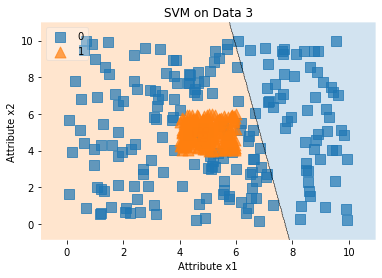

In [57]:
svm_linear.fit(Data3_X, Data3_Y)


plot_decision_regions(X=Data3_X, y=Data3_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM on Data 3')
plt.show()

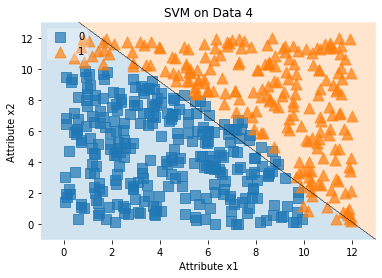

In [58]:
svm_linear.fit(Data4_X, Data4_Y)


plot_decision_regions(X=Data4_X, y=Data4_Y, clf=svm_linear, legend=2, 
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)


plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('SVM on Data 4')
plt.show()

<span style="color:red">**Question 4e:** </span>Explain the reason for your observations in __Question 4c__ using observations from the above decision regions.

<span style="color:green">**Answer:Data 1 had highest accuracy and even in the graph we see that data points are clearly separable. Data 4 has the second highest accuracy and again in data 4 we see that most points are getting classified by the linear svm. Data 3 has lower accuracy where linear svm model is able to classify all points of class 1 but not of class 0. Data 4 has lowest accuracy where all the points in the respective classes are not getting classified ** </span>


### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 5a:** </span>
Compute and print the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [59]:
svm_poly1 = SVC(C=0.5, kernel='poly',degree=1, gamma = 'auto')
svm_poly_scores1 = cross_val_score(svm_poly1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_poly_scores1.mean(), svm_poly_scores1.std()]

[0.13375, 0.05215661511256266]

In [60]:
svm_poly2 = SVC(C=0.5, kernel='poly',degree=2, gamma = 'auto')
svm_poly_scores2 = cross_val_score(svm_poly2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_poly_scores2.mean(), svm_poly_scores2.std()]

[0.865, 0.030516389039334235]

In [61]:
svm_poly3 = SVC(C=0.5, kernel='poly',degree=3, gamma = 'auto')
svm_poly_scores3 = cross_val_score(svm_poly3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_poly_scores3.mean(), svm_poly_scores3.std()]

[0.8762500000000001, 0.026487025125521375]

<span style="color:red">**Question 5b:** </span> Rank the polynomial kernels in decreasing order of accuracy.

<span style="color:green">**Answer:Polynomial kernels in decreasing order of the accuracy are : degee 3 > degree 2 > degree 1
    ** </span>


<span style="color:red">**Question 5c:** </span>  Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

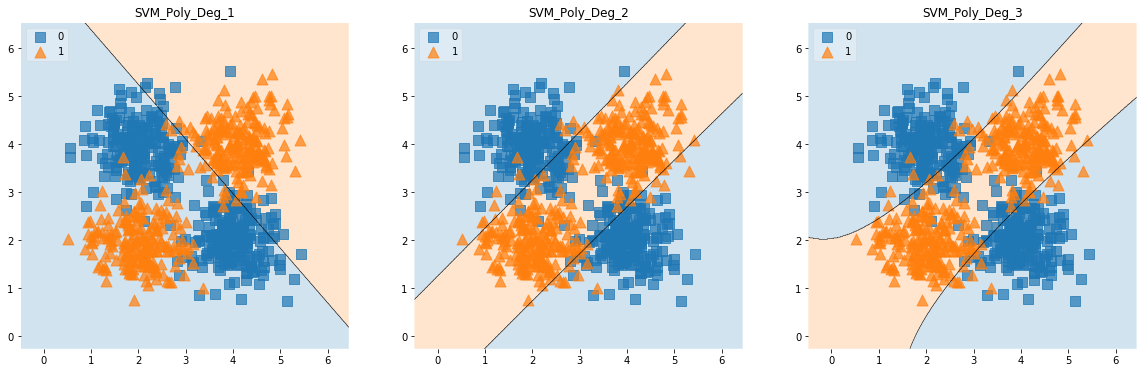

In [74]:
clf_list = [svm_poly1,svm_poly2,svm_poly3]
labels = ['SVM_Poly_Deg_1','SVM_Poly_Deg_2','SVM_Poly_Deg_3']

# Plotting the decision boundaries
fig = plt.figure(figsize=(20,6))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(1,3,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5d:** </span> Based on the decision regions, explain the reason for your observations in __Question 5c__.

<span style="color:green">**Answer:Classification of polynomial SVM with degree 1 shows linear separation and with higher degree we see that classification boundary starts getting more flexible and accuracy increases ** </span>



<span style="color:red">**Question 5e:** </span>  Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [70]:
svm_rbf1 = SVC(C = 0.5, kernel='rbf', gamma=0.01)
svm_rbf1_scores = cross_val_score(svm_rbf1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_rbf1_scores.mean(), svm_rbf1_scores.std()]

[0.30124999999999996, 0.08704345179276841]

In [71]:
svm_rbf2 = SVC(C = 0.5, kernel='rbf', gamma=0.1)
svm_rbf2_scores = cross_val_score(svm_rbf2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_rbf2_scores.mean(), svm_rbf2_scores.std()]

[0.93625, 0.02928843628464996]

In [72]:
svm_rbf3 = SVC(C = 0.5, kernel='rbf', gamma=1)
svm_rbf3_scores = cross_val_score(svm_rbf3, Data2_X, Data2_Y, cv=10, scoring='accuracy')
[svm_rbf3_scores.mean(), svm_rbf3_scores.std()]

[0.9399999999999998, 0.029474565306379]

<span style="color:red">**Question 5f:** </span> Rank the RBF kernels in decreasing order of accuracy.

<span style="color:green">**Answer:Following is the ranking based on accuracy : gamma 1 > gamma 0.1 > gamma 0.01** </span>


<span style="color:red">**Question 5g:** </span>  Plot decision regions for the above RBF Kernels

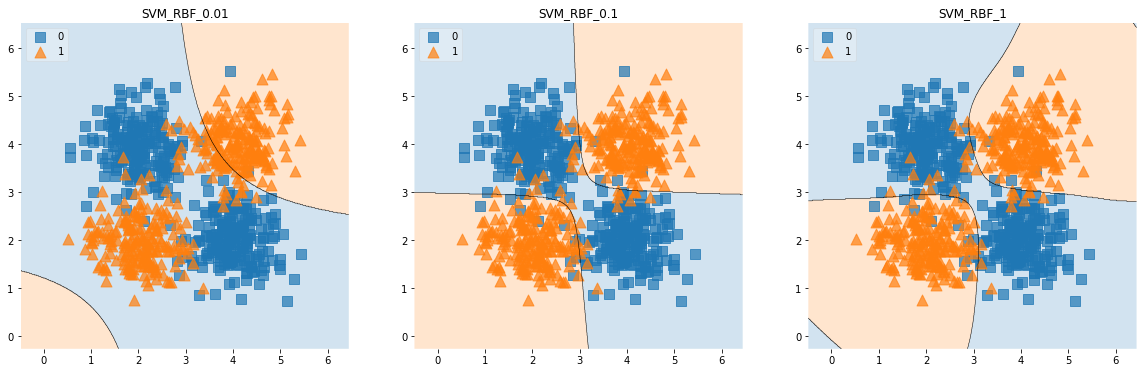

In [75]:
clf_list = [svm_rbf1,svm_rbf2,svm_rbf3]
labels = ['SVM_RBF_0.01','SVM_RBF_0.1','SVM_RBF_1']

# Plotting the decision boundaries
fig = plt.figure(figsize=(20,6))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(1,3,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5h:** </span>  Explain the reason for your observations in __Question 5f__ from the above decision regions.

<span style="color:green">**Answer:FRom the above decision boundaries we see that with increasing values of gamma the accuracy of the respetive model increases and data points are classified perfectly into theri classes** </span>




<span style="color:red">**Question 5i:** </span>  Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data3? Explain your reason.

<span style="color:green">**Answer : 5a which gives us accuracy of around 86-87% by applying SVM with polynomial kernel and 5c gives us accuracy of 93% by applying SVM with RBF kernel. So clearly we can say that svm with rbf kernel is better also from the decision boundaries we see svm with rbf shows more accurate classification and forms flexible boundary ** </span>




### 6. Classification Evaluation

<span style="color:red">**Question 6a:** </span>

Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [76]:
svm_rbf4 = SVC(C = 0.5, kernel='rbf', gamma=0.1)
svm_rbf4_scores = cross_val_score(svm_rbf4, Data2_X, Data2_Y, cv=3, scoring='accuracy')
[svm_rbf4_scores.mean(), svm_rbf4_scores.std()]

[0.903826731006621, 0.025725635665399284]

In [77]:
svm_rbf5 = SVC(C = 0.5, kernel='rbf', gamma=0.1)
svm_rbf5_scores = cross_val_score(svm_rbf5, Data2_X, Data2_Y, cv=4, scoring='accuracy')
[svm_rbf5_scores.mean(), svm_rbf5_scores.std()]

[0.91625, 0.0163458710382775]

In [78]:
svm_rbf6 = SVC(C = 0.5, kernel='rbf', gamma=0.1)
svm_rbf6_scores = cross_val_score(svm_rbf6, Data2_X, Data2_Y, cv=5, scoring='accuracy')
[svm_rbf6_scores.mean(), svm_rbf6_scores.std()]

[0.9275, 0.02186606960566988]

In [79]:
svm_rbf7 = SVC(C = 0.5, kernel='rbf', gamma=0.1)
svm_rbf7_scores = cross_val_score(svm_rbf7, Data2_X, Data2_Y, cv=6, scoring='accuracy')
[svm_rbf7_scores.mean(), svm_rbf7_scores.std()]

[0.9325531433740389, 0.021831954406404414]

<span style="color:green">**Answer:With increasing values of cv we see that accuracy of the model increases as more cross validations gives higher training and testing data which ultimately increases mean accuracy of the model.** </span> 

<span style="color:red">**Question 6b:** </span>

For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

In [89]:
dt_all = DecisionTreeClassifier(max_depth=6)
dt_all_scores = cross_val_score(dt_all, Data3_X, Data3_Y, cv=30, scoring='accuracy')
[dt_all_scores.mean(), dt_all_scores.std()]

[0.9694444444444446, 0.041885291893416776]

In [46]:
dt_all = DecisionTreeClassifier(max_depth=6)
dt_all_scores = cross_val_score(dt_all, Data3_X, Data3_Y, cv=30, scoring='precision')
[dt_all_scores.mean(), dt_all_scores.std()]

[0.9604497354497356, 0.06726733471654624]

In [93]:
nb_all = GaussianNB()
nb1_scores = cross_val_score(nb_all, Data3_X, Data3_Y, cv=30, scoring='accuracy')
[nb1_scores.mean(), nb1_scores.std()]

[0.9591269841269843, 0.05444033720451033]

In [48]:
nb_all = GaussianNB()
nb1_scores = cross_val_score(nb_all, Data3_X, Data3_Y, cv=30, scoring='precision')
[nb1_scores.mean(), nb1_scores.std()]

[0.9328571428571429, 0.08427057975500643]

In [98]:
knn_all = KNeighborsClassifier(n_neighbors=50)
knn_scores = cross_val_score(knn50, Data3_X, Data3_Y, cv=30, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.882142857142857, 0.06530280072334513]

In [99]:
knn_scores = cross_val_score(knn50, Data3_X, Data3_Y, cv=30, scoring='precision')
[knn_scores.mean(), knn_scores.std()]

[0.8184078884078884, 0.08753362350659276]

In [100]:
svm_linear_all = SVC(C=0.5, kernel='linear')
svm_linear_scores = cross_val_score(svm_linear_all, Data3_X, Data3_Y, cv=30, scoring='accuracy')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.6428571428571429, 0.07824607964359515]

In [101]:
svm_linear_scores = cross_val_score(svm_linear_all, Data3_X, Data3_Y, cv=30, scoring='precision')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.5881701631701632, 0.05332344458927299]

In [105]:
svm_poly_all = SVC(C=0.5, kernel='poly',degree=3, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, Data3_X, Data3_Y, cv=30, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.8555555555555555, 0.07477184579881828]

In [106]:
svm_poly_scores = cross_val_score(svm_poly_all, Data3_X, Data3_Y, cv=30, scoring='precision')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.7950348725348725, 0.09462152081876914]

In [107]:
svm_rbf_all = SVC(C = 0.5, kernel='rbf', gamma=1)
svm_rbf_scores = cross_val_score(svm_rbf_all, Data3_X, Data3_Y, cv=30, scoring='accuracy')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.9543650793650794, 0.06254879677362442]

In [109]:
svm_rbf_scores = cross_val_score(svm_rbf_all, Data3_X, Data3_Y, cv=30, scoring='precision')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.9265692640692642, 0.09025612295117419]

<span style="color:green">**Answer:For accuracy : DT > NB > SVM with RBF kernel > Polynomial Kernel SVM >kNN >Linear SVM <br> For Precision : DT > NB > SVM with RBF kernel > Polynomial Kernel SVM >kNN >Linear SVM . <br> basically its same for accurcay and precision** </span> 



### 7. Ensemble Methods

<span style="color:red">**Question 7a:** </span>
 __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [55]:
svm_linear = SVC(C=0.5, kernel='linear')
n_est_list = [1,2,3,4,5,10,20]
for n_est in n_est_list:
    # create an instance of bagging classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    print("Bagging Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 
    
    scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
fig = plt.figure(figsize=(20, 8))

Bagging Accuracy: 0.59 (+/- 0.06) #estimators: 1
Bagging Accuracy: 0.70 (+/- 0.07) #estimators: 2
Bagging Accuracy: 0.60 (+/- 0.05) #estimators: 3
Bagging Accuracy: 0.61 (+/- 0.10) #estimators: 4
Bagging Accuracy: 0.64 (+/- 0.08) #estimators: 5
Bagging Accuracy: 0.72 (+/- 0.08) #estimators: 10
Bagging Accuracy: 0.64 (+/- 0.02) #estimators: 20


<span style="color:green">**Answer:From the above values we see that in the estimators from 4 to 5,accuracy increases but simultaneously st. deviation drops. The whole point of using bagging is to reduce variance in the model which sometimes compromises on accuracy  ** </span> 



<span style="color:red">**Question 7b:** </span>
 Plot decision regions for the above bagging classifiers. 

/users/PES0801/dhwanivora9/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/users/PES0801/dhwanivora9/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


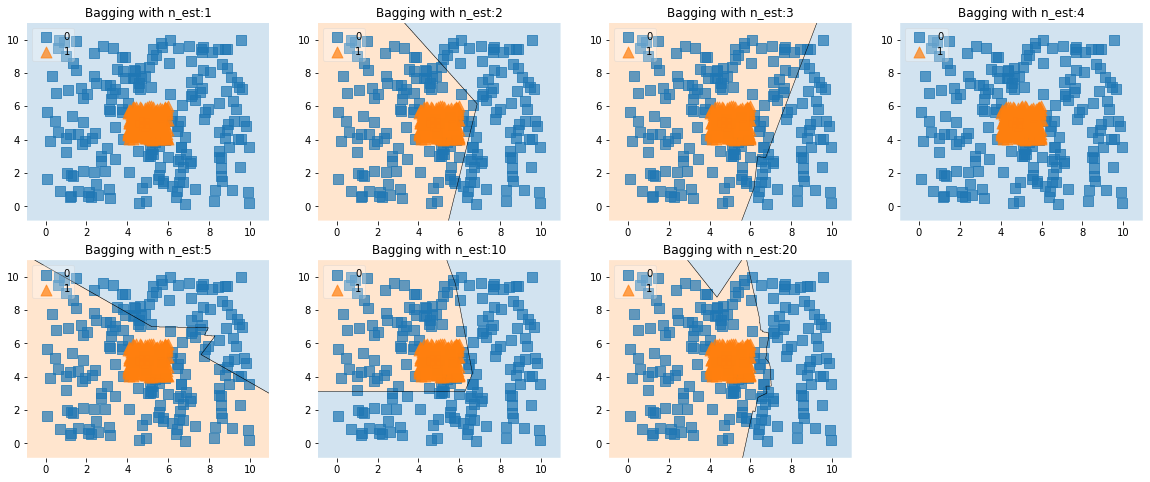

In [56]:

count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    bagging.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))
    
plt.show()

<span style="color:red">**Question 7c:** </span>
 Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator. 

<span style="color:green">**Answer:The quality of decision regions for a bagging classifiers with estimator 10 is seen to have higher accuracy as compared to the one with only 1 estimator however accuracy has seen to be reducing post 10 estimators i.e on 20 it reduces** </span> 



<span style="color:red">**Question 7d:** </span>
 **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. 

In [57]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est)) 

Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 1
Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 2
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 3
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 4
Boosting Accuracy: 0.92 (+/- 0.03) #estimators: 5
Boosting Accuracy: 0.92 (+/- 0.04) #estimators: 10
Boosting Accuracy: 0.91 (+/- 0.04) #estimators: 20
Boosting Accuracy: 0.91 (+/- 0.02) #estimators: 40


<span style="color:green">**Answer:In case of boosting we have seen that with increasing values of estimators we see increase in the boosting accuracy. It is seen highest at estimator 10 with considerably better standard deviation** </span> 



<span style="color:red">**Question 7e:** </span>
 Plot decision regions for above boosting classifiers. Explain your reason for what may have lead to the observations in __Question 7d__.

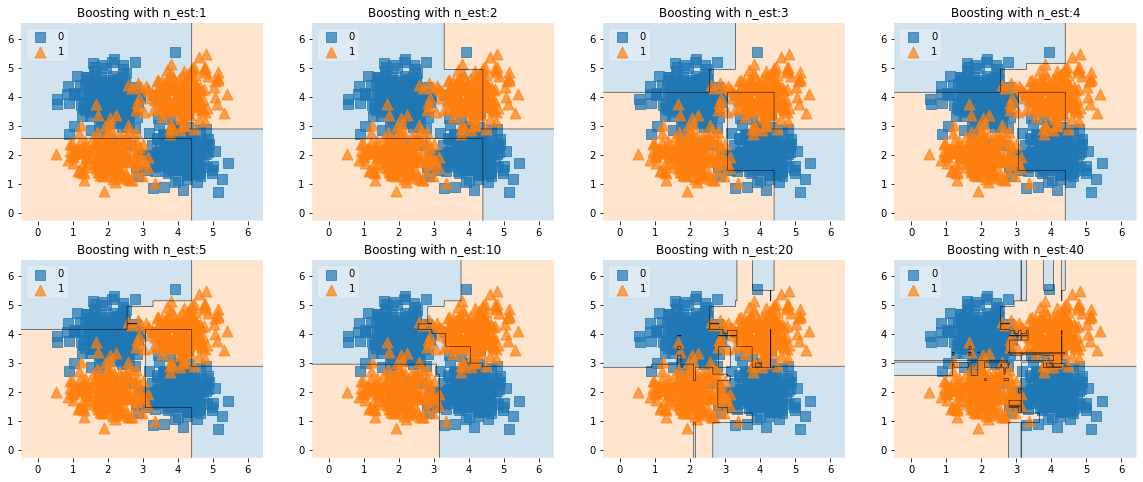

In [115]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    boosting.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=boosting, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

<span style="color:green">**Answer: From the above curves / decision boundaries we see that with one estoimator the boundaries are very general and as estimators keeps on increasing and at 10 and with increasing value of estimators it separates the points much more efficiently** </span> 




### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [6]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [9]:
X = cancer.data
Y = cancer.target

Number of samples are:

In [10]:
X.shape

(569, 30)

<span style="color:red">**Question 8a:** </span>
 Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [122]:
#Linear SVM
svm_linear_all = SVC(C=0.001, kernel='linear')
svm_linear_scores = cross_val_score(svm_linear_all, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.9402460893613342, 0.030630108832408708]

In [123]:
svm_linear_all = SVC(C=0.01, kernel='linear')
svm_linear_scores = cross_val_score(svm_linear_all, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.947235545760954, 0.028461763431799632]

In [124]:
svm_linear_all = SVC(C=0.1, kernel='linear')
svm_linear_scores = cross_val_score(svm_linear_all, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.9472366260478783, 0.020931116465631755]

In [125]:
svm_linear_all = SVC(C=1, kernel='linear')
svm_linear_scores = cross_val_score(svm_linear_all, X, Y, cv=10, scoring='accuracy')
[svm_linear_scores.mean(), svm_linear_scores.std()]

[0.9543179068360554, 0.01940126867424318]

In [126]:
#Polynomial varying C and degree
svm_poly_all = SVC(C=0.001, kernel='poly',degree=1, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.9280269639616281, 0.02968518046820524]

In [127]:
svm_poly_all = SVC(C=0.01, kernel='poly',degree=1, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.9402784979690605, 0.02242540044883814]

In [128]:
svm_poly_all = SVC(C=0.1, kernel='poly',degree=1, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.947266874081756, 0.02482952354062278]

In [18]:
svm_poly_all = SVC(C=1, kernel='poly',degree=1, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.947266874081756, 0.02221239371835221]

In [19]:
svm_poly_all = SVC(C=0.001, kernel='poly',degree=2, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.9490849969751964, 0.02511818448227461]

In [20]:
svm_poly_all = SVC(C=0.01, kernel='poly',degree=2, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.957919583441362, 0.027205751687965476]

In [21]:
svm_poly_all = SVC(C=0.1, kernel='poly',degree=2, gamma = 'auto')
svm_poly_scores = cross_val_score(svm_poly_all, X, Y, cv=10, scoring='accuracy')
[svm_poly_scores.mean(), svm_poly_scores.std()]

[0.957919583441362, 0.024750796037684784]

In [23]:
#RBF varying C and gamma
svm_rbf_all = SVC(C = 0.001, kernel='rbf', gamma=0.001)
svm_rbf_scores = cross_val_score(svm_rbf_all, X, Y, cv=10, scoring='accuracy')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.6274274047186933, 0.00441189245975379]

In [25]:
svm_rbf_all = SVC(C = 1, kernel='rbf', gamma=0.001)
svm_rbf_scores = cross_val_score(svm_rbf_all, X, Y, cv=10, scoring='accuracy')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.9242416385792065, 0.020068189165683634]

In [26]:
svm_rbf_all = SVC(C = 0.001, kernel='rbf', gamma=100)
svm_rbf_scores = cross_val_score(svm_rbf_all, X, Y, cv=10, scoring='accuracy')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.6274274047186933, 0.00441189245975379]

In [27]:
svm_rbf_all = SVC(C = 1, kernel='rbf', gamma=100)
svm_rbf_scores = cross_val_score(svm_rbf_all, X, Y, cv=10, scoring='accuracy')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.6274274047186933, 0.00441189245975379]

In [28]:
svm_rbf_all = SVC(C = 0.1, kernel='rbf', gamma=100)
svm_rbf_scores = cross_val_score(svm_rbf_all, X, Y, cv=10, scoring='accuracy')
[svm_rbf_scores.mean(), svm_rbf_scores.std()]

[0.6274274047186933, 0.00441189245975379]

<span style="color:green">**Answer:From the above tried multiple combinations of c values , degree values and gamma values we see that SVM with polynomial kernel with degree 2 and c values of 0.01/0.1 gives highest accuracy of 0.957** </span> 


<span style="color:red">**Question 8b:** </span>
 Similar to __Question 8a__ explore decision trees with different max_depth to determine which values returns the best classifier.

In [29]:
dt_all = DecisionTreeClassifier(max_depth=6)
dt_all_scores = cross_val_score(dt_all, X, Y, cv=10, scoring='accuracy')
[dt_all_scores.mean(), dt_all_scores.std()]

[0.9193792671333505, 0.03808867923871397]

In [30]:
dt_all = DecisionTreeClassifier(max_depth=2)
dt_all_scores = cross_val_score(dt_all, X, Y, cv=10, scoring='accuracy')
[dt_all_scores.mean(), dt_all_scores.std()]

[0.9193781868464264, 0.025424450286370862]

In [58]:
dt_all = DecisionTreeClassifier(max_depth=4)
dt_all_scores = cross_val_score(dt_all, X, Y, cv=10, scoring='accuracy')
[dt_all_scores.mean(), dt_all_scores.std()]

[0.9193792671333506, 0.04423251464623482]

In [39]:
dt_all = DecisionTreeClassifier(max_depth=5)
dt_all_scores = cross_val_score(dt_all, X, Y, cv=10, scoring='accuracy')
[dt_all_scores.mean(), dt_all_scores.std()]

[0.9228891193500994, 0.03732058748789455]

<span style="color:green">**Answer:Max depth = 5 gives a classifier with higest accuracy and this indeeds to be the best classifier** </span> 



<span style="color:red">**Question 8c:** </span>
 Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

<span style="color:green">**Answer: From the above calculated accuracies we can say that svm with kernel polynomial has highest accuracy of 0.957 so svm with kernel polynomial will be used for classification ** </span> 
